# Data Preparation

In [9]:
# Pandas for data loading and processing
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Numpy for diverse math functions
import numpy as np
#Data preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
# Warnings remove
import warnings
warnings.simplefilter(action='ignore')


In [15]:
# Reading data from schwartau
schwartau_daily = pd.read_csv('data/summary/schwartau_daily.csv')
schwartau_hourly = pd.read_csv('data/summary/schwartau_hourly.csv')
wurzburg_daily = pd.read_csv('data/summary/wurzburg_daily.csv')
wurzburg_hourly = pd.read_csv('data/summary/wurzburg_hourly.csv')

### Preparition of daily data 

In [78]:
#find the null values in each column
schwartau_daily.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
timestamp,0
flow,0
humidity,5
temperature,5
weight,5


In [79]:
schwartau_daily_filtered=schwartau_daily.dropna()

In [80]:
#describe our data
schwartau_daily_filtered[schwartau_daily_filtered.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,flow,humidity,temperature,weight
count,876.000000,876.000000,876.000000,876.000000
mean,4662.026256,83.971694,22.626615,56839.330086
std,13336.712644,25.696414,11.636127,16884.585391
min,-7682.000000,-100.000000,-5.454276,-169.769700
25%,-69.000000,78.276604,12.448929,49771.869774
50%,-5.000000,90.821111,24.397715,58061.394757
75%,651.500000,96.400521,34.193187,67307.663472
max,103985.000000,100.000000,35.373833,91227.268542


In [81]:
#find the null values in each column
wurzburg_daily.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
timestamp,0
flow,0
humidity,148
temperature,148
weight,148


In [82]:
wurzburg_daily_filtered=wurzburg_daily.dropna()

In [83]:
#describe our data
wurzburg_daily_filtered[wurzburg_daily_filtered.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,flow,humidity,temperature,weight
count,722.000000,722.000000,722.000000,722.000000
mean,-1603.552632,76.103329,16.519482,53.606062
std,3163.076816,12.248505,8.792786,8.911415
min,-17273.000000,43.587847,-2.648782,-0.121151
25%,-1600.250000,69.809720,8.617321,50.759662
50%,-66.500000,78.964354,16.333688,53.519758
75%,-10.000000,85.437790,24.514476,56.464722
max,3456.000000,95.619514,31.908409,68.510927


In [84]:
schwartau_daily_filtered['flow_processed'] = np.where(schwartau_daily_filtered['flow']>=0, 1, 0)
wurzburg_daily_filtered['flow_processed'] = np.where(wurzburg_daily_filtered['flow']>=0, 1, 0)

In [85]:
schwartau_daily_filtered.head(5)

,timestamp,flow,humidity,temperature,weight,flow_processed
0,2017-01-01,-5,98.040310,15.477829,50736.790078,0
1,2017-01-02,-22,98.806319,13.376389,50657.796250,0
2,2017-01-03,-30,98.403472,16.181965,50769.785556,0
3,2017-01-04,-28,97.292292,14.724111,50532.602778,0
4,2017-01-05,-11,96.583889,9.058442,50109.808194,0


In [86]:
wurzburg_daily_filtered.head(5)

,timestamp,flow,humidity,temperature,weight,flow_processed
0,2017-01-01,-6,92.058947,-0.082160,52.661690,0
1,2017-01-02,-9,92.794722,1.825578,52.671111,0
2,2017-01-03,-7,91.173472,3.082557,52.653767,0
3,2017-01-04,-21,91.077917,3.750071,52.610835,0
4,2017-01-05,-12,82.656076,2.259225,52.623591,0


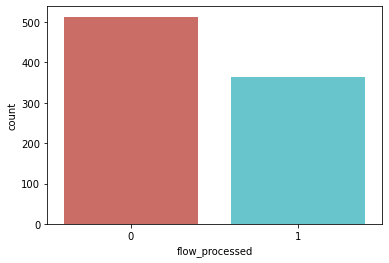

In [87]:
sns.countplot(x='flow_processed', data=schwartau_daily_filtered, palette = 'hls')
plt.show()

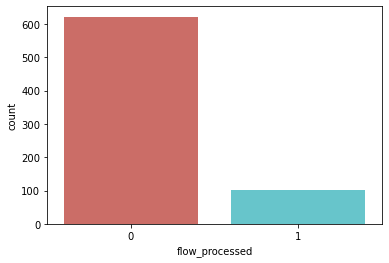

In [88]:
sns.countplot(x='flow_processed', data=wurzburg_daily_filtered, palette = 'hls')
plt.show()

In [89]:
schwartau_daily_filtered.drop(['flow'], axis = 'columns', inplace=True)
scaler_schwartau = MinMaxScaler()
schwartau_daily_filtered[['humidity', 'temperature', 'weight']] = scaler_schwartau.fit_transform(schwartau_daily_filtered[['humidity', 'temperature', 'weight']])


wurzburg_daily_filtered.drop(['flow'], axis = 'columns', inplace=True)
scaler_wurzburg = MinMaxScaler()
wurzburg_daily_filtered[['humidity', 'temperature', 'weight']] = scaler_wurzburg.fit_transform(wurzburg_daily_filtered[['humidity', 'temperature', 'weight']])

In [91]:
schwartau_daily_filtered.to_csv('data/summary/schwartau_daily_filtered.csv', index = False, header=True)
wurzburg_daily_filtered.to_csv('data/summary/wurzburg_daily_filtered.csv', index = False, header=True)